In [74]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
#packages  
import scipy.stats as stats 
from scipy.stats import mannwhitneyu, ttest_ind

In [75]:
# import data
'''
Os dados são originalmente do desenvolvedor IBM e abordam um problema típico de uma empresa de telecomunicações. 
O conjunto de dados completo pode ser encontrado no link abaixo.
Embora não haja descrição explícita dos dados, os nomes das colunas nos permitem um bom entendimento sobre o problema.
'''

data_path = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
'''
Na análise exploratória faço algumas observações e reconheço alguns padrões de comportamento para clientes que continuam na empresa (ativos)
e clientes que cancelam o serviço (clientes churn).
'''

'\nNa análise exploratória faço algumas observações e reconheço alguns padrões de comportamento para clientes que continuam na empresa (ativos)\ne clientes que cancelam o serviço (clientes churn).\n'

In [77]:
## Análise exploratória
# criar um dataframe auxiliar para analisar os dados ausentes
cons = pd.DataFrame({
                    'type': df.dtypes,
                    'missing' : df.isna().sum(),
                    'size' : df.shape[0],
                    'unique': df.nunique()})
cons['percentual'] = round(cons['missing'] / cons['size'],2)
cons

,type,missing,size,unique,percentual
customerID,object,0,7043,7043,0.0
gender,object,0,7043,2,0.0
SeniorCitizen,int64,0,7043,2,0.0
Partner,object,0,7043,2,0.0
Dependents,object,0,7043,2,0.0
tenure,int64,0,7043,73,0.0
PhoneService,object,0,7043,2,0.0
MultipleLines,object,0,7043,3,0.0
InternetService,object,0,7043,3,0.0
OnlineSecurity,object,0,7043,3,0.0


In [78]:
# selecionando colunas internas de objetos
obejct_col = df.select_dtypes(include='object').columns.tolist()
obejct_col

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [79]:
# remove colunas que não são realmente categóricas
obejct_col.remove('customerID')
obejct_col.remove('TotalCharges')
obejct_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [80]:
# criar conjunto de dados de rotatividade
df_churn= df[df.Churn == "Yes" ]
df_nochurn= df[df.Churn == "No" ]

In [81]:
# proporção de contratos mês a mês no conjunto de dados geral 
contract_general = (df[df.Contract=='Month-to-month'].value_counts().shape[0]/df.shape[0])*100

# proporção de contratos mês a mês para clientes que mudam  
contract_churn = (df_churn[df_churn.Contract=='Month-to-month'].value_counts().shape[0]/df_churn.shape[0])*100

# proporção de contratos mês a mês para clientes que não desistiram  
contract_nochurn = (df[(df.Churn=='No') & (df.Contract=='Month-to-month')].shape[0]/df[df.Churn=='No'].shape[0])*100

Porcentagem de contratos mensais: 55.02%
Porcentagem de contratos mensais de clientes que não mudaram: 42.91%
Porcentagem de contratos mensais de clientes que mudaram: 88.55%


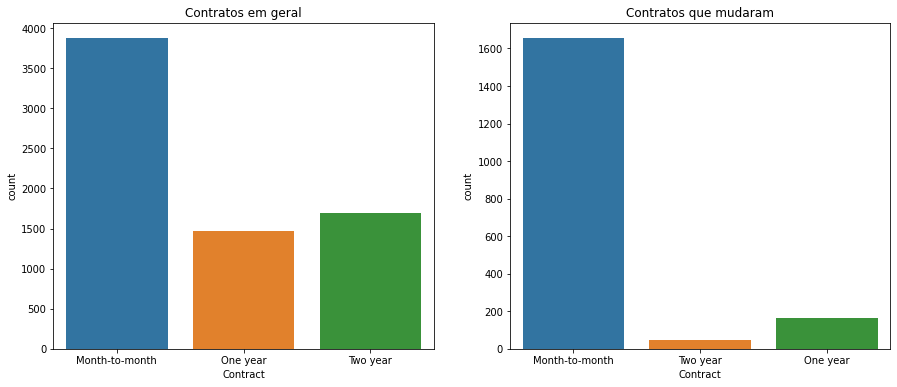

In [82]:
print('Porcentagem de contratos mensais: {:.2f}%'.format(contract_general))
print('Porcentagem de contratos mensais de clientes que não mudaram: {:.2f}%'.format(contract_nochurn))
print('Porcentagem de contratos mensais de clientes que mudaram: {:.2f}%'.format(contract_churn))

# gráficos de comparação
fig, (ax1,ax2) = plt.subplots(nrows= 1,ncols=2,figsize=(15,6))
sns.countplot(x="Contract", data =df,ax=ax1)
ax1.set_title("Contratos em geral")
sns.countplot(x="Contract", data =df_churn,ax=ax2)
ax2.set_title("Contratos que mudaram")

plt.show()

Parceiro
Para a empresa, talvez o ideal seja ter como clientes pessoas que tenham parceiros, pois se um não usa mas o outro sim, *provavelmente eles vão considerar com mais cuidado antes de cancelar o serviço.*

In [83]:
# rotatividade de proporção de parceiro pra quem cancela o serviço
partner_churn_yes = (df_churn[df_churn.Partner=='Yes'].shape[0]/df_churn.shape[0])*100
partner_churn_no = (df_churn[df_churn.Partner=='No'].shape[0]/df_churn.shape[0])*100

# rotatividade de proporção de parceiro para os clientes ativos
partner_nochurn_yes = (df_nochurn[df_nochurn.Partner=='Yes'].shape[0]/df_nochurn.shape[0])*100
partner_nochurn_no = (df_nochurn[df_nochurn.Partner=='No'].shape[0]/df_nochurn.shape[0])*100

# printando resultados
print('Clientes que não cancelaram (Ativos) e tinham parceiro {:.2f}%. \n {:.2f} nao fizeram \n Clientes que cancelaram e tinham parceiro {:.2f}%. \n {:.2f} não fizeram'.format(partner_nochurn_yes,partner_nochurn_no,partner_churn_yes,partner_churn_no))

Clientes que não cancelaram (Ativos) e tinham parceiro 52.82%. 
 47.18 nao fizeram 
 Clientes que cancelaram e tinham parceiro 35.79%. 
 64.21 não fizeram


In [84]:
'''
Na análise exploratória é feita algumas observações para clientes que continuam na empresa (ativos) 
e clientes que cancelam o serviço (clientes churn).

Agora, irei testar as hipóteses se clientes com algumas características 
ficam mais tempo no serviço ou não. Para isso utilizarei a biblioteca SciPy.

O t-test exige que as distribuições sejam normais e variância igual. 
Por isso vamos usar funções auxiliares para testar se os grupos tem essas características.
'''

'\nNa análise exploratória é feita algumas observações para clientes que continuam na empresa (ativos) \ne clientes que cancelam o serviço (clientes churn).\n\nAgora, irei testar as hipóteses se clientes com algumas características \nficam mais tempo no serviço ou não. Para isso utilizarei a biblioteca SciPy.\n\nO t-test exige que as distribuições sejam normais e variância igual. \nPor isso vamos usar funções auxiliares para testar se os grupos tem essas características.\n'

In [85]:
# Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return (False)
    if pval < 0.05: return (False)
  return (True)

# teste de variância igual
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return (False)
  return (True)

In [86]:
# teste de hipótese
def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Relizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

**Questão 1:** O tipo do contrato influencia o Life-time do cliente?

In [87]:
'''
Contratos com pequenas duração (mês a mês) os clientes tem mais possibilidades de cancelar o serviço. 
Em contratos mais longos essa possibilidade se reduz, por isso para muitas empresas é vantagem cobrar menos mensalmente por um contrato anual 
a fim de garantir que o LTV (life time value) seja maior que seu CAC (customer aquisition cost).
'''
df_churn_short= df_churn[df_churn.Contract == "Month-to-month" ].reset_index(drop = True)
df_churn_long = df_churn[(df_churn.Contract == "One year")|(df_nochurn.Contract == "Two year")].reset_index(drop = True)
df_nochurn_short= df_nochurn[df_nochurn.Contract == "Month-to-month" ].reset_index(drop = True)
df_nochurn_long = df_nochurn[(df_nochurn.Contract == "One year")|(df_nochurn.Contract == "Two year")].reset_index(drop = True)

<ipython-input-87-711de1ca0ca8>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_churn_long = df_churn[(df_churn.Contract == "One year")|(df_nochurn.Contract == "Two year")].reset_index(drop = True)


**Testando para clientes que cancelam o serviço**

In [88]:
'''
tenure — variável que representa o tempo que o cliente fica ativo no serviço em meses.
'''

print(np.mean(df_churn_short.tenure)) # Tenure médio de contratos curtos
print(np.mean(df_churn_long.tenure)) # Tenure médio de contratos longos

14.016918429003022
44.963855421686745


# Vamos verificar se essa diferença é estatisticamente relevante com o teste de hipótese:

*H0 - não existe diferença entre o life-time de clientes com contratos curtos ou longos*

*HA - existe diferença entre o life-time de clientes com contratos curtos e longos*

In [89]:
# separar em grupos

grupo1 = df_churn_long.tenure
grupo2 = df_churn_short.tenure

# testar a hipotese

stats_test(grupo1, grupo2)

Relizando t-test com variancia diferente...


Ttest_indResult(statistic=20.94236959750065, pvalue=2.7136943151361676e-51)

**p-value < 0.05 — H0 rejeitada**

**Testando para clientes ativos**

In [90]:
'''
tenure — variável que representa o tempo que o cliente fica ativo no serviço em meses.
'''

print(np.mean(df_nochurn_short.tenure)) # Tenure médio de contratos curtos
print(np.mean(df_nochurn_long.tenure)) # Tenure médio de contratos longos

21.033333333333335
49.997630331753555


# Vamos verificar se essa diferença é estatisticamente relevante com o teste de hipótese:

*H0 - não existe diferença entre o life-time de clientes com contratos curtos ou longos*

*HA - existe diferença entre o life-time de clientes com contratos curtos e longos*

In [91]:
# separar em grupos

grupo1 = df_nochurn_long.tenure
grupo2 = df_nochurn_short.tenure

# testar a hipotese

stats_test(grupo1, grupo2)

Relizando t-test com variancia diferente...


Ttest_indResult(statistic=53.850679397616425, pvalue=0.0)

**p-value < 0.05 — H0 rejeitada**

Podemos então não negar que os clientes que tem contratos longos realmente ficam mais tempo em nossos serviços. Nesse sentido, uma boa alternativa é de que a empresa deve investir na aquisição de clientes com contratos mais longos e/ou transferir clientes com contratos curtos para longos.

**Questão 2:** Será que os clientes que tem algum companheiro ficam mais tempo?

In [92]:
'''
Durante o estudo foi observada um diferença na proporção de clientes que tinham parceiros entre os dois grupos. 
Foi observado que clientes que tinham parceiros ficam mais tempo no serviço. Podem ter várias explicações para isso,
uma delas é que mesmo que um não use ou goste do serviço, o outro pode gostar, assim a assinatura é mantida. 
Para confirmar que essa diferença tem relevância estatística podemos fazer um teste de hipótese.
'''

# rotatividade de proporção de parceiro pra quem cancela o serviço
partner_churn_yes = df_churn[df_churn.Partner=='Yes'].reset_index(drop = True)
partner_churn_no = df_churn[df_churn.Partner=='No'].reset_index(drop = True)
# rotatividade de proporção de parceiro para os clientes ativos
partner_nochurn_yes = df_nochurn[df_nochurn.Partner=='Yes'].reset_index(drop = True)
partner_nochurn_no = df_nochurn[df_nochurn.Partner=='No'].reset_index(drop = True)

**Testando para clientes que cancelam o serviço**

In [93]:
'''
tenure — variável que representa o tempo que o cliente fica ativo no serviço em meses.
'''

print(np.mean(partner_churn_yes.tenure)) # Tenure médio de clientes com parceiros:
print(np.mean(partner_churn_no.tenure)) # Tenure médio de clientes sem parceiros:

26.593423019431988
13.176666666666666


# Vamos verificar se essa diferença é estatisticamente relevante com o teste de hipótese:

*H0 - não existe diferença entre o life-time de clientes com o fato de terem parceiros*

*HA - existe diferença entre o life-time de clientes com o fato de terem parceiros*

In [94]:
# separar em grupos

grupo1 = partner_churn_yes.tenure
grupo2 = partner_churn_no.tenure

# testar a hipotese

stats_test(grupo1, grupo2)

Relizando t-test com variancia diferente...


Ttest_indResult(statistic=13.881169994193163, pvalue=1.9038182189270238e-40)

**p-value < 0.05 — H0 rejeitada**  

Rejeitamos a hipótese de que ter parceiros não faz diferença no período que esses cliente fica em nosso serviço.

**Testando para clientes ativos**

In [95]:
'''
tenure — variável que representa o tempo que o cliente fica ativo no serviço em meses.
'''

print(np.mean(partner_nochurn_yes.tenure)) # Tenure médio de clientes com parceiros:
print(np.mean(partner_nochurn_no.tenure)) # Tenure médio de clientes sem parceiros:

45.793267471642885
28.36296599754199


# Vamos verificar se essa diferença é estatisticamente relevante com o teste de hipótese:

*H0 - não existe diferença entre o life-time de clientes com o fato de terem parceiros*

*HA - existe diferença entre o life-time de clientes com o fato de terem parceiros*

In [96]:
# separar em grupos

grupo1 = partner_nochurn_yes.tenure
grupo2 = partner_nochurn_no.tenure

# testar a hipotese

stats_test(grupo1, grupo2)

Realizando t-test...


Ttest_indResult(statistic=27.828286957272113, pvalue=6.086689207514799e-159)

**p-value<0.05 — rejeitamos a hipótese nula**